<a href="https://colab.research.google.com/github/dzhamalovas/Osnovy_programming/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0_2_%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%B8%D0%B3%D0%BC%D1%8B_%D0%9E%D0%9E%D0%9F_%D0%9D%D0%B0%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример построения иерархии классов, представленных на рисунке 2.1

In [ ]:
class Person:
  def __init__(self, nаmе='Человек без имени'):
    self.nаmе = nаmе
    self.age = 0
  def say(self):
    print("{0} говорит".format(self.nаmе))
# Person - родительский класс
class Employee(Person):
  def set_job(self, job_title='Безработный'):
    self.job_title = job_title
  def get_job(self):
    print(self.job_title)
class Customer(Person):
  def set_email(self, email='Heт почты'):
    self.email = email
  def get_email(self):
    print(self.email)
# создаем человека с именем 'Петр':
person = Person('Петр')
# просим человека что-нибудь сказать:
person.say()
# создаем работника без имени:
emp = Employee()
emp.say() # метод наследовался из класса Person
# хотим, чтобы в момент создания Employee
# заполнялась должность
cust = Customer('Елена')
cust.say()
# метод наследовался из класса Person
# хотим, чтобы в момент создания Customer
# заполнялась почта 


Петр говорит
Человек без имени говорит
Елена говорит


## В примере по умолчанию наследуется конструктор базового класса Person, но в нем не определяются атрибуты дочерних классов. Исправим ситуацию путем переопределения конструктора в дочерних классах

In [ ]:
class Person:
  def __init__(self, name='Человек без имени'):
    self.name = name
    self.age = 0
  def say(self):
    print("{0} говорит".format(self.name))
class Employee(Person):
  # переопределяем конструктор:
  def __init__(self, name):
    # вызываем конструктор базового класса:
    Person.__init__(self)
    # определяем атрибут по умолчанию:
    self.job_title = 'безработный'
  def set_job(self, job_title='безработный'):
    self.job_title = job_title
  def get_job(self):
    print('Игорь', self.job_title)

class Customer(Person):
  def __init__(self, name):
    Person.__init__(self)
    self.email = 'не имеет почты'
  def set_email(self, email='не имеет почты'):
    self.email = email
  def get_email(self):
    print('Петр', self.email)
person = Person('Иван')
person.say()
emp = Employee('Игорь')
# emp.say()
emp.get_job()
cust = Customer('Петр')
# cust.say()
cust.get_email()

Иван говорит
Игорь безработный
Петр не имеет почты


In [ ]:
class Person:
  def __init__(self, name='Человек без имени'):
    self.name = name
    self.age = 0
  def say(self):
    print("{0} говорит".format(self.name))
class Employee(Person):
  # переопределяем конструктор:
  def __init__(self, name):
    # вызываем конструктор базового класса:
    Person.__init__(self)
    # определяем атрибут по умолчанию:
    self.job_title = 'Безработный'
  def set_job(self, job_title='Безработный'):
    self.job_title = job_title
  def get_job(self):
    print(self.name, self.job_title)

class Customer(Person):
  def __init__(self, name):
    Person.__init__(self)
    self.email = 'Нет почты'
  def set_email(self, email='Нет почты'):
    self.email = email
  def get_email(self):
    print(self.name, self.email)
person = Person('Иван')
person.say()
emp = Employee('Игорь')
# emp.say()
emp.get_job()
cust = Customer('Петр')
# cust.say()
cust.get_email()

Иван говорит
Человек без имени Безработный
Человек без имени Нет почты


## Если язык программирования поддерживает множественное наследование, то у одного класса-потомка, может быть, несколько родительских классов. Язык Python поддерживает множественное наследование. Поля родительского класса при наследовании переходят к классу-потомку. Кроме того, поля родительского класса могут переопределены у потомка.

In [ ]:
class A:
  def some_function(self):
    print("First function")
  def other_function(self):
    print("Second function")
class B:
  def method_in_B(self):
    print("Third function")
class C(A):
  def other_function(self):
    print("Replaced function")
class D(B, C):
  pass
# Посмотрим все атрибуты класса, не являющиеся служебными
print("A:\t", list(filter(lambda x: "__" not in x, dir(A)))) # \t - (tab) табуляция
print("B:\t", list(filter(lambda x: "__" not in x, dir(B)))) # \t - (tab) табуляция
print("C(A):\t", list(filter(lambda x: "__" not in x, dir(C)))) # \t - (tab) табуляция
print("D(B,C):\t", list(filter(lambda x: "__" not in x, dir(D)))) # \t - (tab) табуляция
print()
# Посмотрим на реализацию функции в D
d = D()
d.method_in_B()
d.some_function()
d.other_function()
print() 


A:	 ['other_function', 'some_function']
B:	 ['method_in_B']
C(A):	 ['other_function', 'some_function']
D(B,C):	 ['method_in_B', 'other_function', 'some_function']

Third function
First function
Replaced function



# Наследование – одна из самых важных и мощных парадигм ООП. При наследовании мы оперируем такими понятиями, как родительский класс и класс потомок. Класс-потомок наследует методы и переменные, определенные в родительском классе.

In [ ]:
class A:
  var_A = 1
  def method_A(self):
    print("A")
class B(A):
  var_B = 2
  def method_B(self):
    print("B")
class C(B):
  var_C = 3
  def method_C(self):
    print("C")
print("A:\t", list(filter(lambda x: "__" not in x, dir(A))))
print("B(A):\t", list(filter(lambda x: "__" not in x, dir(B))))
print("C(B):\t", list(filter(lambda x: "__" not in x, dir(C))))
print()


A:	 ['method_A', 'var_A']
B(A):	 ['method_A', 'method_B', 'var_A', 'var_B']
C(B):	 ['method_A', 'method_B', 'method_C', 'var_A', 'var_B', 'var_C']



## При наследовании класс-потомок может переопределять методы и переменные родительского класса:

In [ ]:
class A:
  value = 13
  def some_method(self):
    print(f"Method in A, value = {self.value}")
class B(A):
  def some_method(self):
    print(f"Method in B, value = {self.value}")
class C(B):
  value = 6
  def some_method(self):
    print(f"Method in C, value = {self.value}")
A().some_method()
B().some_method()
C().some_method()
print()


Method in A, value = 13
Method in B, value = 13
Method in C, value = 6



## Множественное наследование позволяет получить доступ к атрибутам нескольких родительских классов.

In [ ]:
class A:
  def some_function(self):
    print("First function")
  def other_function(self):
    print("Second function")
class B:
  def method_in_B(self):
    print("Third function")
class С(A, B):
  pass
# Посмотрим все атрибуты класса, не являющиеся служебными
print("A:\t", list(filter(lambda x: "__" not in x, dir(A))))
print("B:\t", list(filter(lambda x: "__" not in x, dir(B))))
print("С(A,B):\t", list(filter(lambda x: "__" not in x, dir(С))))
print() 


A:	 ['other_function', 'some_function']
B:	 ['method_in_B']
С(A,B):	 ['method_in_B', 'other_function', 'some_function']



# Ромб смерти

Одна из проблем множественного наследования – Ромб Смерти.
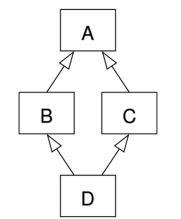
При этом класс-наследник не знает, какую из реализаций некоторого
метода следует выбрать. Эта проблема решается при помощи виртуального
наследования. При этом вместо наследования реализации метода в класспотомок передается ссылка на метод родительского класса. Однако, если классыпотомки первого уровня оба переопределяют некоторый метод, все еще остается
вопрос, какая из реализаций должна передаваться потомку второго уровня. Для
этого в Python версии 2.3 и выше применяется механизм С3-линеаризации